Designed by Federica Bianco:

visualization homework

improving plots

2019 version: DSPS UDel 

In [1]:
import pylab as pl
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import pandas as pd
# you will use astropy to make the contours-scatter plot
from astropy import constants as const
from astropy import units as u
pylab.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

# high density to contours examples

## get data on  star data from kepler2 mission

In [0]:

url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI"
url +="?table=k2targets&select=epic_number,k2_teff,k2_rad"
url +="&format=CSV"



In [4]:
df = pd.read_csv(url)
df.head()

,epic_number,k2_teff,k2_rad
0,60018365,NaN,NaN
1,60018369,NaN,NaN
2,60018371,NaN,NaN
3,60018372,NaN,NaN
4,60018374,NaN,NaN


In [0]:
## Add a column for the star luminosity in Watts
follow [this description](http://personal.psu.edu/mxe17/A010/lectures/lect19.html) Section 2


The luminosity of the star is $4 ~ \pi ~ r^2 ~\sigma~ T^4$
with $\sigma$ Boltzmann constand, $T$ temperature, $r$ radius of the star. 

Note that the radius is given in sun radii, use ```const.R_sun``` to get the radius in natural units instead.

In [0]:
df['k2_L'] = 4 * np.pi * (df['k2_rad'] * const.R_sun)**2 * \
            const.sigma_sb * df['k2_teff']**4 
#Adding a column for luminosity in (Watts)

In [6]:
df.head()

,epic_number,k2_teff,k2_rad,k2_L
0,60018365,NaN,NaN,NaN
1,60018369,NaN,NaN,NaN
2,60018371,NaN,NaN,NaN
3,60018372,NaN,NaN,NaN
4,60018374,NaN,NaN,NaN


## Plot the HR diagram:

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


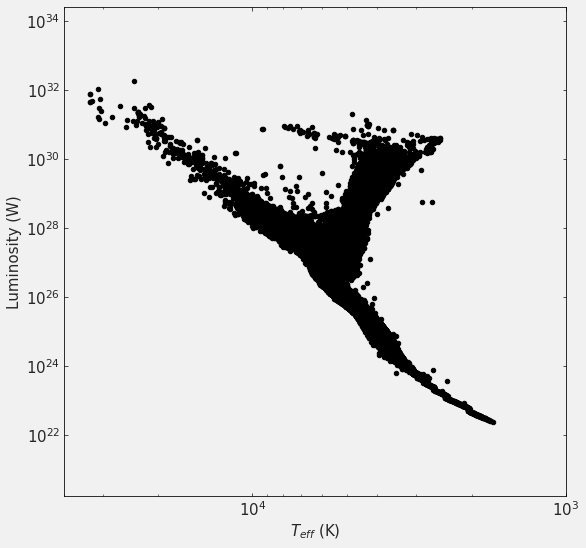

In [7]:

df.plot.scatter(x='k2_teff',y='k2_L', loglog=True, color='k', s=20, figsize=(9,9))
plt.xlim(40000,1000)
plt.xlabel(r'$T_{eff}$ (K)')
plt.ylabel('Luminosity (W)');


## Fig : Plot of Luminosity vs effective temperature of star.

## Plot the HR diagram using transparency to better the readability of the plot:

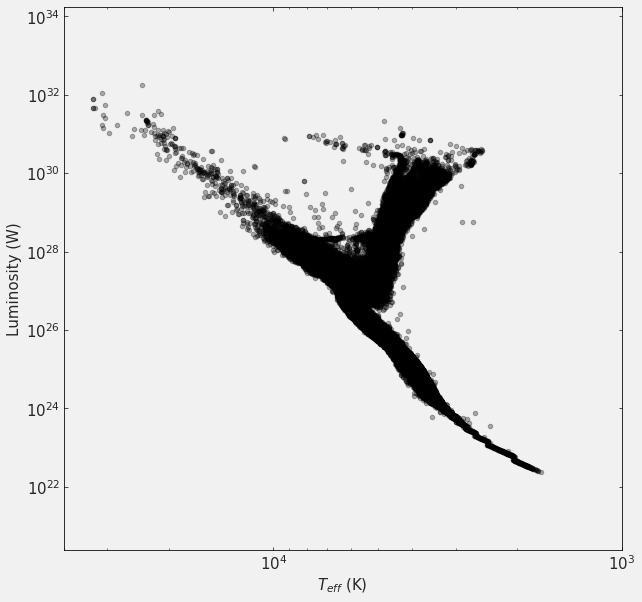

In [14]:

df.plot.scatter('k2_teff', 'k2_L', c='k', s=20, loglog=True, figsize=(10,10),  alpha=0.3)
plt.xlim(40000, 1000)
plt.xlabel(r'$T_{eff}$ (K)')
plt.ylabel('Luminosity (W)');


## Fig : Transparency Plot of Luminosity vs effective temperature of star.

In [0]:

#dropna so you can use the astropy module
teff_na = df['k2_teff'].dropna()
L_na = df['k2_L'].dropna()

## AstroML version

In [16]:
!pip install astroML

     |████████████████████████████████| 112kB 3.5MB/s 
  Created wheel for astroML: filename=astroML-0.4.1-cp36-none-any.whl size=128663 sha256=f5436782f630caae077bc0df4c2ef2728849e9136e767d34c188133d40959336
  Stored in directory: /root/.cache/pip/wheels/7c/f2/f3/eb817cfb31b4445358dd7dda2434e02003f72801edabc38c97
Successfully built astroML


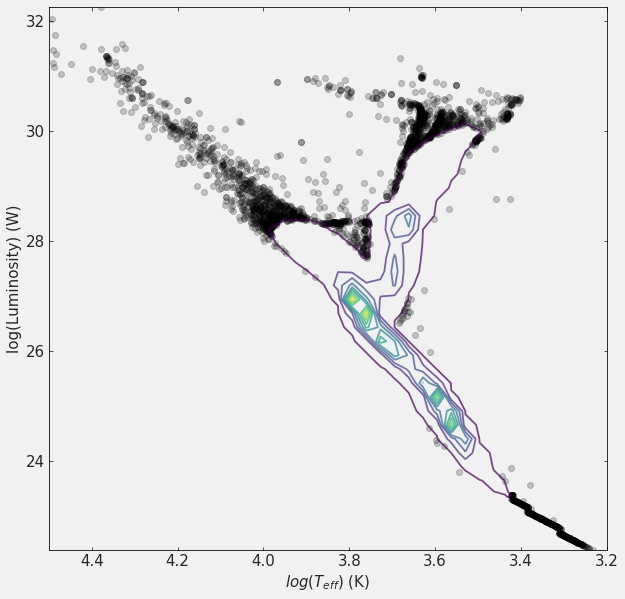

In [46]:

from astroML import plotting
#rememnber that you are making a log-log plot
x = np.log10(teff_na) # conveting values to log10
y = np.log10(L_na)

ax = plt.figure(figsize=(10,10)).add_subplot()
plotting.scatter_contour(ax=ax, x=x, y=y,
                         filled_contour=False, histogram2d_args={'bins': (40,40)},
                         plot_args={'marker': 'o', 'alpha': 0.2, 'color':'k'},
                         contour_args={'alpha':0.7, 'linewidths':1.8})

plt.ylabel('log(Luminosity) (W)')
plt.xlabel(r'$log(T_{eff})$ (K)')
plt.xlim(4.5, 3.2)
plt.savefig("k2scatter_contour.png")

## Fig:  HR diagram of the same plot above using python library astroML.

# by-hand version

Here is how you would do this by hand.

In [0]:
H, xbins, ybins = np.histogram2d(np.log10(teff_na), np.log10(L_na), bins=(40, 40))
Hsort = np.sort(H.flatten())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: linewidths is ignored by contourf


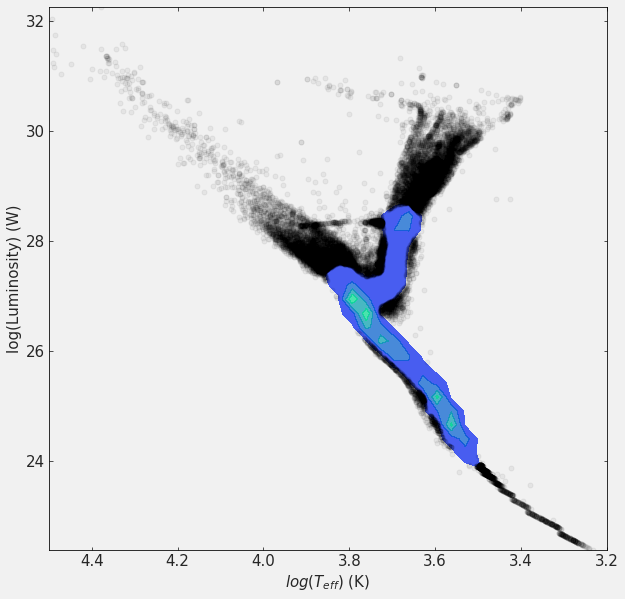

In [25]:
extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
ax = pl.figure(figsize=(10,10)).add_subplot(111)
levels = np.linspace(H.max()/15, H.max(), 5)
i_min = np.argmin(levels)
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)

#contours = ax.contourf(H.T, levels, extent=extent, cmap='bone')
X = np.hstack([np.log10(teff_na)[:, None], np.log10(L_na)[:, None]])

if len(outline.allsegs[0]) > 0:
    outer_poly = outline.allsegs[0][0]
    try:
        # this works in newer matplotlib versions
        from matplotlib.path import Path
        points_inside = Path(outer_poly).contains_points(X)
    except:
        # this works in older matplotlib versions
        import matplotlib.nxutils as nx
        points_inside = nx.points_inside_poly(X, outer_poly)

    Xplot = X[~points_inside]
else:
    Xplot = X

points = ax.plot(Xplot[:, 0], Xplot[:, 1], '.', ms=10, alpha=0.05, c='k')
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)
axc = contourf(H.T, extent=extent, levels=levels, 
               linewidths=3, cmap='winter', alpha=0.7)

plt.xlim(4.5,3.2)
plt.ylabel('log(Luminosity) (W)')
plt.xlabel(r'$log(T_{eff})$ (K)');

## Fig: Repeat of the last plot above but without using astroMl package. It takes a lot more coding to reproduce the same plot if we dont use the astroMl package.